In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd 
from pandas_datareader import data as pdr
import pandas_datareader.data as web
import datetime as dt
import seaborn as sns

In [2]:
"""
rev_ford = pd.read_excel('Ford Revenue by Quarter.xlsx')
rev_toyota = pd.read_excel('Toyota Revenue by Quarter.xlsx')
rev_ford.Value= rev_ford.Value.apply(lambda x: float(x[:-1])*10**9)
rev_toyota.Value= rev_toyota.Value.apply(lambda x: float(x[:-1])*10**9)
"""
start = dt.datetime(2000,1,1)
end = dt.datetime.now()

stock_ford =pdr.get_data_yahoo('F',start,end)
stock_toyota = pdr.get_data_yahoo('TM',start,end)
stock_ford = stock_ford.groupby(pd.PeriodIndex(stock_ford.index, freq='M')).Close.mean()
stock_toyota = stock_toyota.groupby(pd.PeriodIndex(stock_toyota.index, freq='M')).Close.mean()

e_toyota = pd.read_csv("employeetoyotasentiment.csv")
c_toyota= pd.read_csv("consumertoyotasentiment.csv")
toyota = e_toyota.append(c_toyota).sort_index()
c_ford = pd.read_csv('consumerfordsentiment.csv')
e_ford= pd.read_csv("employeefordsentiment.csv")
ford = e_ford.append(c_ford).sort_index()
e_toyota = pd.read_csv("employeetoyotasentiment.csv")



In [3]:
e_toyota = pd.read_csv("employeetoyotasentiment.csv")
len(e_toyota)

9756

In [4]:
sent = []

for i in range(len(e_toyota)):
    comp = e_toyota.iloc[i]['compound']

    if (comp >= -0.05) & (comp <= 0.05):
        sent.append('neu')
    elif comp > 0.5:
        sent.append('pos')
    else:
        sent.append('neg')
        
e_toyota['sentiment'] = sent
e_toyota.drop(columns=['positive','negative','neutral'],inplace=True)
total_comment = e_toyota.groupby(pd.PeriodIndex(e_toyota.date, freq='M')).review.count()
mean_comp = e_toyota.groupby(pd.PeriodIndex(e_toyota.date, freq='M')).compound.mean()
mean_sents = e_toyota.groupby(pd.PeriodIndex(e_toyota.date, freq='M'))['sentiment'].value_counts().unstack().fillna(0)[['neg','neu','pos']]
mean_rating = e_toyota.groupby(pd.PeriodIndex(e_toyota.date, freq='M')).rating.mean()
e_toyota = pd.DataFrame(mean_rating).join(mean_sents, lsuffix='_caller', rsuffix='_other')
e_toyota = e_toyota.join(mean_comp,lsuffix='_caller', rsuffix='_other')
e_toyota = e_toyota.join(total_comment,lsuffix='_caller', rsuffix='_other')
e_toyota.columns = ['AvgRate','NegRevCount','NeuRevCount','PosRevCount','AvgCompound','TotalRevCount']
e_toyota['PercPos'] = (e_toyota.PosRevCount / e_toyota.TotalRevCount)
e_toyota = e_toyota.join(pd.DataFrame(stock_toyota))
c_toyota= pd.read_csv("consumertoyotasentiment.csv")

sent = []

for i in range(len(c_toyota)):
    comp = c_toyota.iloc[i]['compound']

    if (comp >= -0.05) & (comp <= 0.05):
        sent.append('neu')
    elif comp > 0.5:
        sent.append('pos')
    else:
        sent.append('neg')
        
c_toyota['sentiment'] = sent
c_toyota.drop(columns=['positive','negative','neutral'],inplace=True)
total_comment = c_toyota.groupby(pd.PeriodIndex(c_toyota.date, freq='M')).review.count()
mean_comp = c_toyota.groupby(pd.PeriodIndex(c_toyota.date, freq='M')).compound.mean()
mean_sents = c_toyota.groupby(pd.PeriodIndex(c_toyota.date, freq='M'))['sentiment'].value_counts().unstack().fillna(0)[['neg','neu','pos']]
mean_rating = c_toyota.groupby(pd.PeriodIndex(c_toyota.date, freq='M')).rating.mean()
c_toyota = pd.DataFrame(mean_rating).join(mean_sents, lsuffix='_caller', rsuffix='_other')
c_toyota = c_toyota.join(mean_comp,lsuffix='_caller', rsuffix='_other')
c_toyota = c_toyota.join(total_comment,lsuffix='_caller', rsuffix='_other')
c_toyota.columns = ['AvgRate','NegRevCount','NeuRevCount','PosRevCount','AvgCompound','TotalRevCount']
c_toyota['PercPos'] = (c_toyota.PosRevCount / c_toyota.TotalRevCount)
c_toyota = c_toyota.join(pd.DataFrame(stock_toyota))

In [5]:
sent = []

for i in range(len(e_ford)):
    comp = e_ford.iloc[i]['compound']

    if (comp >= -0.05) & (comp <= 0.05):
        sent.append('neu')
    elif comp > 0.5:
        sent.append('pos')
    else:
        sent.append('neg')
        
e_ford['sentiment'] = sent
e_ford.drop(columns=['positive','negative','neutral'],inplace=True)
total_comment = e_ford.groupby(pd.PeriodIndex(e_ford.date, freq='M')).review.count()
mean_comp = e_ford.groupby(pd.PeriodIndex(e_ford.date, freq='M')).compound.mean()
mean_sents = e_ford.groupby(pd.PeriodIndex(e_ford.date, freq='M'))['sentiment'].value_counts().unstack().fillna(0)[['neg','neu','pos']]
mean_rating = e_ford.groupby(pd.PeriodIndex(e_ford.date, freq='M')).rating.mean()
e_ford = pd.DataFrame(mean_rating).join(mean_sents, lsuffix='_caller', rsuffix='_other')
e_ford = e_ford.join(mean_comp,lsuffix='_caller', rsuffix='_other')
e_ford = e_ford.join(total_comment,lsuffix='_caller', rsuffix='_other')
e_ford.columns = ['AvgRate','NegRevCount','NeuRevCount','PosRevCount','AvgCompound','TotalRevCount']
e_ford['PercPos'] = (e_ford.PosRevCount / e_ford.TotalRevCount)
e_ford = e_ford.join(pd.DataFrame(stock_ford))

sent = []

for i in range(len(c_ford)):
    comp = c_ford.iloc[i]['compound']

    if (comp >= -0.05) & (comp <= 0.05):
        sent.append('neu')
    elif comp > 0.5:
        sent.append('pos')
    else:
        sent.append('neg')
        
c_ford['sentiment'] = sent
c_ford.drop(columns=['positive','negative','neutral'],inplace=True)
total_comment = c_ford.groupby(pd.PeriodIndex(c_ford.date, freq='M')).review.count()
mean_comp = c_ford.groupby(pd.PeriodIndex(c_ford.date, freq='M')).compound.mean()
mean_sents = c_ford.groupby(pd.PeriodIndex(c_ford.date, freq='M'))['sentiment'].value_counts().unstack().fillna(0)[['neg','neu','pos']]
mean_rating = c_ford.groupby(pd.PeriodIndex(c_ford.date, freq='M')).rating.mean()
c_ford = pd.DataFrame(mean_rating).join(mean_sents, lsuffix='_caller', rsuffix='_other')
c_ford = c_ford.join(mean_comp,lsuffix='_caller', rsuffix='_other')
c_ford = c_ford.join(total_comment,lsuffix='_caller', rsuffix='_other')
c_ford.columns = ['AvgRate','NegRevCount','NeuRevCount','PosRevCount','AvgCompound','TotalRevCount']
c_ford['PercPos'] = (c_ford.PosRevCount / c_ford.TotalRevCount)
c_ford = c_ford.join(pd.DataFrame(stock_ford))

In [6]:
sent = []

for i in range(len(ford)):
    comp = ford.iloc[i]['compound']

    if (comp >= -0.05) & (comp <= 0.05):
        sent.append('neu')
    elif comp > 0.5:
        sent.append('pos')
    else:
        sent.append('neg')
        
ford['sentiment'] = sent
ford.drop(columns=['positive','negative','neutral'],inplace=True)
total_comment = ford.groupby(pd.PeriodIndex(ford.date, freq='M')).review.count()
mean_comp = ford.groupby(pd.PeriodIndex(ford.date, freq='M')).compound.mean()
mean_sents = ford.groupby(pd.PeriodIndex(ford.date, freq='M'))['sentiment'].value_counts().unstack().fillna(0)[['neg','neu','pos']]
mean_rating = ford.groupby(pd.PeriodIndex(ford.date, freq='M')).rating.mean()
ford = pd.DataFrame(mean_rating).join(mean_sents, lsuffix='_caller', rsuffix='_other')
ford = ford.join(mean_comp,lsuffix='_caller', rsuffix='_other')
ford = ford.join(total_comment,lsuffix='_caller', rsuffix='_other')
ford.columns = ['AvgRate','NegRevCount','NeuRevCount','PosRevCount','AvgCompound','TotalRevCount']
ford['PercPos'] = (ford.PosRevCount / ford.TotalRevCount)
ford = ford.join(pd.DataFrame(stock_ford))

sent = []

for i in range(len(toyota)):
    comp = toyota.iloc[i]['compound']

    if (comp >= -0.05) & (comp <= 0.05):
        sent.append('neu')
    elif comp > 0.5:
        sent.append('pos')
    else:
        sent.append('neg')
        
toyota['sentiment'] = sent
toyota.drop(columns=['positive','negative','neutral'],inplace=True)
total_comment = toyota.groupby(pd.PeriodIndex(toyota.date, freq='M')).review.count()
mean_comp = toyota.groupby(pd.PeriodIndex(toyota.date, freq='M')).compound.mean()
mean_sents = toyota.groupby(pd.PeriodIndex(toyota.date, freq='M'))['sentiment'].value_counts().unstack().fillna(0)[['neg','neu','pos']]
mean_rating = toyota.groupby(pd.PeriodIndex(toyota.date, freq='M')).rating.mean()
toyota = pd.DataFrame(mean_rating).join(mean_sents, lsuffix='_caller', rsuffix='_other')
toyota = toyota.join(mean_comp,lsuffix='_caller', rsuffix='_other')
toyota = toyota.join(total_comment,lsuffix='_caller', rsuffix='_other')
toyota.columns = ['AvgRate','NegRevCount','NeuRevCount','PosRevCount','AvgCompound','TotalRevCount']
toyota['PercPos'] = (toyota.PosRevCount / toyota.TotalRevCount)
toyota = toyota.join(pd.DataFrame(stock_toyota))

In [7]:
"""
rev_ford['date'] = ford.index
rev_ford = rev_ford.drop(columns=['Date'])
rev_ford = rev_ford.set_index('date')
rev_ford.columns = ['Revenue']
ford = ford.join(rev_ford)

rev_toyota['date'] = ford.index
rev_toyota = rev_toyota.drop(columns=['Date'])
rev_toyota = rev_toyota.set_index('date')
rev_toyota.columns = ['Revenue']
toyota = toyota.join(rev_toyota)

c_toyota = c_toyota.join(rev_toyota)
e_toyota = e_toyota.join(rev_toyota)
c_ford = c_ford.join(rev_ford)
e_ford = e_ford.join(rev_ford)
"""

"\nrev_ford['date'] = ford.index\nrev_ford = rev_ford.drop(columns=['Date'])\nrev_ford = rev_ford.set_index('date')\nrev_ford.columns = ['Revenue']\nford = ford.join(rev_ford)\n\nrev_toyota['date'] = ford.index\nrev_toyota = rev_toyota.drop(columns=['Date'])\nrev_toyota = rev_toyota.set_index('date')\nrev_toyota.columns = ['Revenue']\ntoyota = toyota.join(rev_toyota)\n\nc_toyota = c_toyota.join(rev_toyota)\ne_toyota = e_toyota.join(rev_toyota)\nc_ford = c_ford.join(rev_ford)\ne_ford = e_ford.join(rev_ford)\n"

In [8]:
f_fama = pd.read_csv('FordFama.csv')
t_fama = pd.read_csv('ToyotaFama.csv')

In [9]:
f_fama = pd.read_csv('FordFama.csv')
t_fama = pd.read_csv('ToyotaFama.csv')
f_fama.columns = ['date','F','Mkt-RF','SMB','HML','RF','F_RF']
f_fama.drop(columns=['F','F_RF','RF'],inplace=True)
t_fama.columns = ['date','TM','Mkt-RF','SMB','HML','RF','TM_RF']
t_fama.drop(columns=['TM','RF','TM_RF'],inplace=True)
f = {'Mkt-RF': 'mean', 'SMB': 'mean', 'HML': 'mean'}
t_fama = t_fama.groupby(pd.PeriodIndex(t_fama.date, freq='M')).agg(f)
f_fama = f_fama.groupby(pd.PeriodIndex(f_fama.date, freq='M')).agg(f)

toyota = toyota.join(t_fama)
ford = ford.join(f_fama)



In [10]:
toyota_s = pd.read_excel('mtoyotasales.xlsx')
toyota_s = toyota_s.set_index('year')

t_sales = []

for i in range(0,17):
    for j in range(0,12):
        t_sales.append(toyota_s.iloc[i,j])

datetime_series = pd.Series(
    pd.date_range("2005-01-01", periods=204, freq="M")
)

t_sales = pd.concat([datetime_series, pd.Series(t_sales)],axis=1)

t_sales.columns = ['date','sales']
t_sales = t_sales.set_index('date')

t_sales = t_sales.groupby(pd.PeriodIndex(t_sales.index, freq='M')).sales.sum()
toyota = toyota.join(pd.DataFrame(t_sales))

ford_s = pd.read_excel('mfordsales.xlsx')
ford_s = ford_s.set_index('year')

f_sales = []

for i in range(0,17):
    for j in range(0,12):
        f_sales.append(ford_s.iloc[i,j])

datetime_series = pd.Series(
    pd.date_range("2005-01-01", periods=204, freq="M")
)

f_sales = pd.concat([datetime_series, pd.Series(f_sales)],axis=1)

f_sales.columns = ['date','sales']
f_sales = f_sales.set_index('date')

f_sales = f_sales.groupby(pd.PeriodIndex(f_sales.index, freq='M')).sales.sum()
ford = ford.join(pd.DataFrame(f_sales))

In [11]:
c_ford = c_ford.join(pd.DataFrame(f_sales))
e_ford = e_ford.join(pd.DataFrame(f_sales))
c_toyota = c_toyota.join(pd.DataFrame(t_sales))
e_toyota = e_toyota.join(pd.DataFrame(t_sales))


In [12]:
"""
toyota.to_excel('C:\\Users\\baris.baturay\\Desktop\\Fordham\\Web Analytics\\Project\\BeforeML\\TOYOTA_monthly.xlsx')
ford.to_excel('C:\\Users\\baris.baturay\\Desktop\\Fordham\\Web Analytics\\Project\\BeforeML\\FORD_monthly.xlsx')
c_ford.to_excel('C:\\Users\\baris.baturay\\Desktop\\Fordham\\Web Analytics\\Project\\BeforeML\\cFord_monhtly.xlsx')
e_ford.to_excel('C:\\Users\\baris.baturay\\Desktop\\Fordham\\Web Analytics\\Project\\BeforeML\\eFord_monthly.xlsx')
c_toyota.to_excel('C:\\Users\\baris.baturay\\Desktop\\Fordham\\Web Analytics\\Project\\BeforeML\\cToyota_monthly.xlsx')
e_toyota.to_excel('C:\\Users\\baris.baturay\\Desktop\\Fordham\\Web Analytics\\Project\\BeforeML\\eToyota_monthly.xlsx')
"""


"\ntoyota.to_excel('C:\\Users\\baris.baturay\\Desktop\\Fordham\\Web Analytics\\Project\\BeforeML\\TOYOTA_monthly.xlsx')\nford.to_excel('C:\\Users\\baris.baturay\\Desktop\\Fordham\\Web Analytics\\Project\\BeforeML\\FORD_monthly.xlsx')\nc_ford.to_excel('C:\\Users\\baris.baturay\\Desktop\\Fordham\\Web Analytics\\Project\\BeforeML\\cFord_monhtly.xlsx')\ne_ford.to_excel('C:\\Users\\baris.baturay\\Desktop\\Fordham\\Web Analytics\\Project\\BeforeML\\eFord_monthly.xlsx')\nc_toyota.to_excel('C:\\Users\\baris.baturay\\Desktop\\Fordham\\Web Analytics\\Project\\BeforeML\\cToyota_monthly.xlsx')\ne_toyota.to_excel('C:\\Users\\baris.baturay\\Desktop\\Fordham\\Web Analytics\\Project\\BeforeML\\eToyota_monthly.xlsx')\n"

<AxesSubplot:title={'center':'Ford Corralation Heat Map'}>

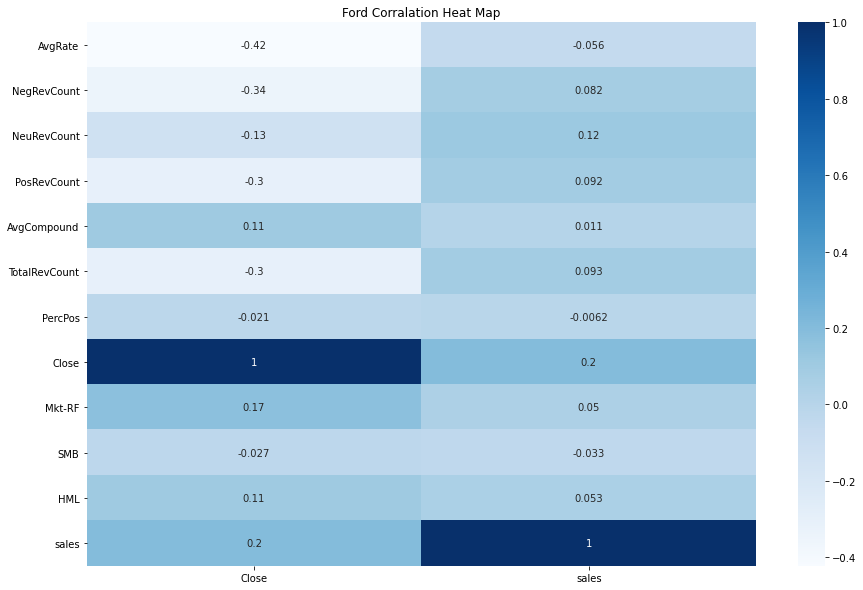

In [18]:
plt.figure(figsize=(15,10))
plt.title('Ford Corralation Heat Map')
sns.heatmap(ford.dropna(how='any').corr()[['Close','sales']],annot= True,cmap='Blues')

<AxesSubplot:title={'center':'Toyota Corralation Heat Map'}>

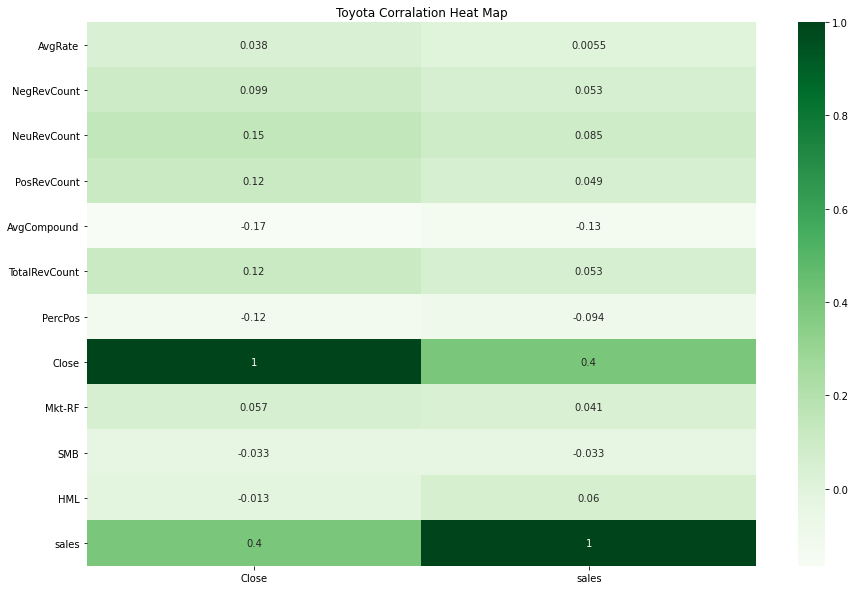

In [17]:
plt.figure(figsize=(15,10))
plt.title('Toyota Corralation Heat Map')
sns.heatmap(toyota.dropna(how='any').corr()[['Close','sales']],annot= True,cmap='Greens')

In [24]:
toyota.describe()[['AvgRate','PercPos','AvgCompound','Close','sales']]

,AvgRate,PercPos,AvgCompound,Close,sales
count,259.000000,259.000000,259.000000,259.000000,200.000000
mean,4.063096,0.734955,0.588666,99.848693,61024.950000
std,0.588925,0.120412,0.128290,30.535640,16007.373476
min,1.000000,0.000000,-0.270700,43.883810,0.000000
25%,3.751344,0.697857,0.537071,76.506191,49543.250000
50%,4.285714,0.729958,0.576787,103.166666,63021.000000
75%,4.511975,0.767055,0.625949,122.650878,71169.250000
max,5.000000,1.000000,0.992400,182.692501,126905.000000
